In [1]:
import os
import glob

import pandas as pd
import numpy as np

import cv2

import matplotlib.pyplot as plt

## 1. Load test images

Load test images and resize to 640 * 480 to getting more close to real test data.

In [7]:
test_images_folder = "test_images"
test_images = glob.glob(test_images_folder+"/*")
print(" Found", len(test_images), "test images.")
for image in test_images:
    image_cv = cv2.imread(image)
    image_cv = cv2.resize(image_cv, (640, 480))
    cv2.imwrite(image, image_cv)

 Found 53 test images.


## 2. Localize the images in different maps

#### Make localization BOW index

./../tools_map/build/make_index original/database.db original/sparse/ original/VocIndex.bin /home/viki/UTOPA/Server_Localization/vocabs/vocab_garden.bin

original with_feature_1 with_feature_2

In [ ]:
!./../tools_map/build/make_index original/database.db original/sparse/ original/VocIndex.bin /home/viki/UTOPA/Server_Localization/vocabs/vocab_garden.bin
!./../tools_map/build/make_index with_feature_1/database.db with_feature_1/sparse/ with_feature_1/VocIndex.bin /home/viki/UTOPA/Server_Localization/vocabs/vocab_garden.bin
!./../tools_map/build/make_index with_feature_2/database.db with_feature_2/sparse/ with_feature_2/VocIndex.bin /home/viki/UTOPA/Server_Localization/vocabs/vocab_garden.bin

#### localization test

Usage: ./example database_path sparse_map_path voc_indices_path test_images_path out_put_folder focus_length

In [ ]:
!mkdir test_images_debug_o
!./../tools_map/build/example original/database.db original/sparse original/VocIndex.bin test_images/ test_images_debug_o/ 498

In [ ]:
!mkdir test_images_debug_1
!./../tools_map/build/example with_feature_1/database.db with_feature_1/sparse with_feature_1/VocIndex.bin test_images/ test_images_debug_1/ 498

In [ ]:
!mkdir test_images_debug_2
!./../tools_map/build/example with_feature_2/database.db with_feature_2/sparse with_feature_2/VocIndex.bin test_images/ test_images_debug_2/ 498

**Original** : Total image number : 53, success number : 40

**Feature 1** : Total image number : 53, success number : 50

**Feature 2** : Total image number : 53, success number : 53

## 4. Show debug images

In [38]:
def count_debug_image(idx, failed_images, failed_image_folder, debug_folder):
    image = failed_images[idx]
    search_name = image[len(failed_image_folder):-4]
    debug_images = glob.glob(debug_folder + "/" + search_name + "_*")
    total_img = len(debug_images)
    return total_img

def plot_debug_image(idx, failed_images, failed_image_folder, debug_folder):
    image = failed_images[idx]
    search_name = image[len(failed_image_folder):-4]
    debug_images = glob.glob(debug_folder + "/" + search_name + "_*")
    debug_images.sort()
    num = int(np.ceil(len(debug_images)/2))
    plt.figure(figsize=(20,70))
    total_img = len(debug_images)
    for i in range(total_img):
        plt.subplot(num*2, 1, (i+1))
        image_cv = cv2.imread(debug_images[i])
        b,g,r = cv2.split(image_cv)  
        image_cv = cv2.merge([r,g,b])  
        plt.imshow(image_cv)
        
def cvshow_debug_image(idx, failed_images, failed_image_folder, debug_folder, b_add = False,additional_img = None):
    image = failed_images[idx]
    search_name = image[len(failed_image_folder):-4]
    debug_images = glob.glob(debug_folder + "/" + search_name + "_*")
    debug_images.sort()
    total_img = len(debug_images)
    i = 0
    while i < total_img:
        image_cv = cv2.imread(debug_images[i])
        if(b_add):
            image_cv=cv2.vconcat([image_cv,additional_img])
        
        cv2.imshow("Debug Image Show "+search_name, image_cv)
        key = cv2.waitKey(1)
        if key == ord('d'): 
            i += 1
        elif key == ord('a'): 
            i -= 1
            i = max(i,0)
        elif key == ord('q'):
            break
    cv2.destroyAllWindows()

def found_image(idx, failed_images, failed_image_folder, debug_folder):
    image = failed_images[idx]
    search_name = image[len(failed_image_folder):-4]
    debug_images = glob.glob(debug_folder + "/" + search_name + "_*")
    #debug_images.sort()
    total_img = len(debug_images)
    if(total_img == 10):
        return False, None
    image_cv = cv2.imread(debug_images[-1])
    return True, image_cv

In [34]:
test_image_folder = 'test_images/'
debug_folder = 'test_images_debug_o/'
debug_folder_1 = 'test_images_debug_1/'
debug_folder_2 = 'test_images_debug_2/'
test_images = glob.glob(test_image_folder+"/*")
test_images.sort()

In [35]:
failed_id = []
for idx in range(len(test_images)):
    count = count_debug_image(idx,test_images, test_image_folder, debug_folder)
    if(count == 10):
        failed_id.append(idx)
print("Have", len(failed_id),"localizatio tests failed")

Have 13 localizatio tests failed


In [41]:
for idx in failed_id:
    ret, img = found_image(idx, test_images, test_image_folder, debug_folder_2)
    cvshow_debug_image(idx, test_images, test_image_folder, debug_folder, ret, img)

## 5. Simple Analysis

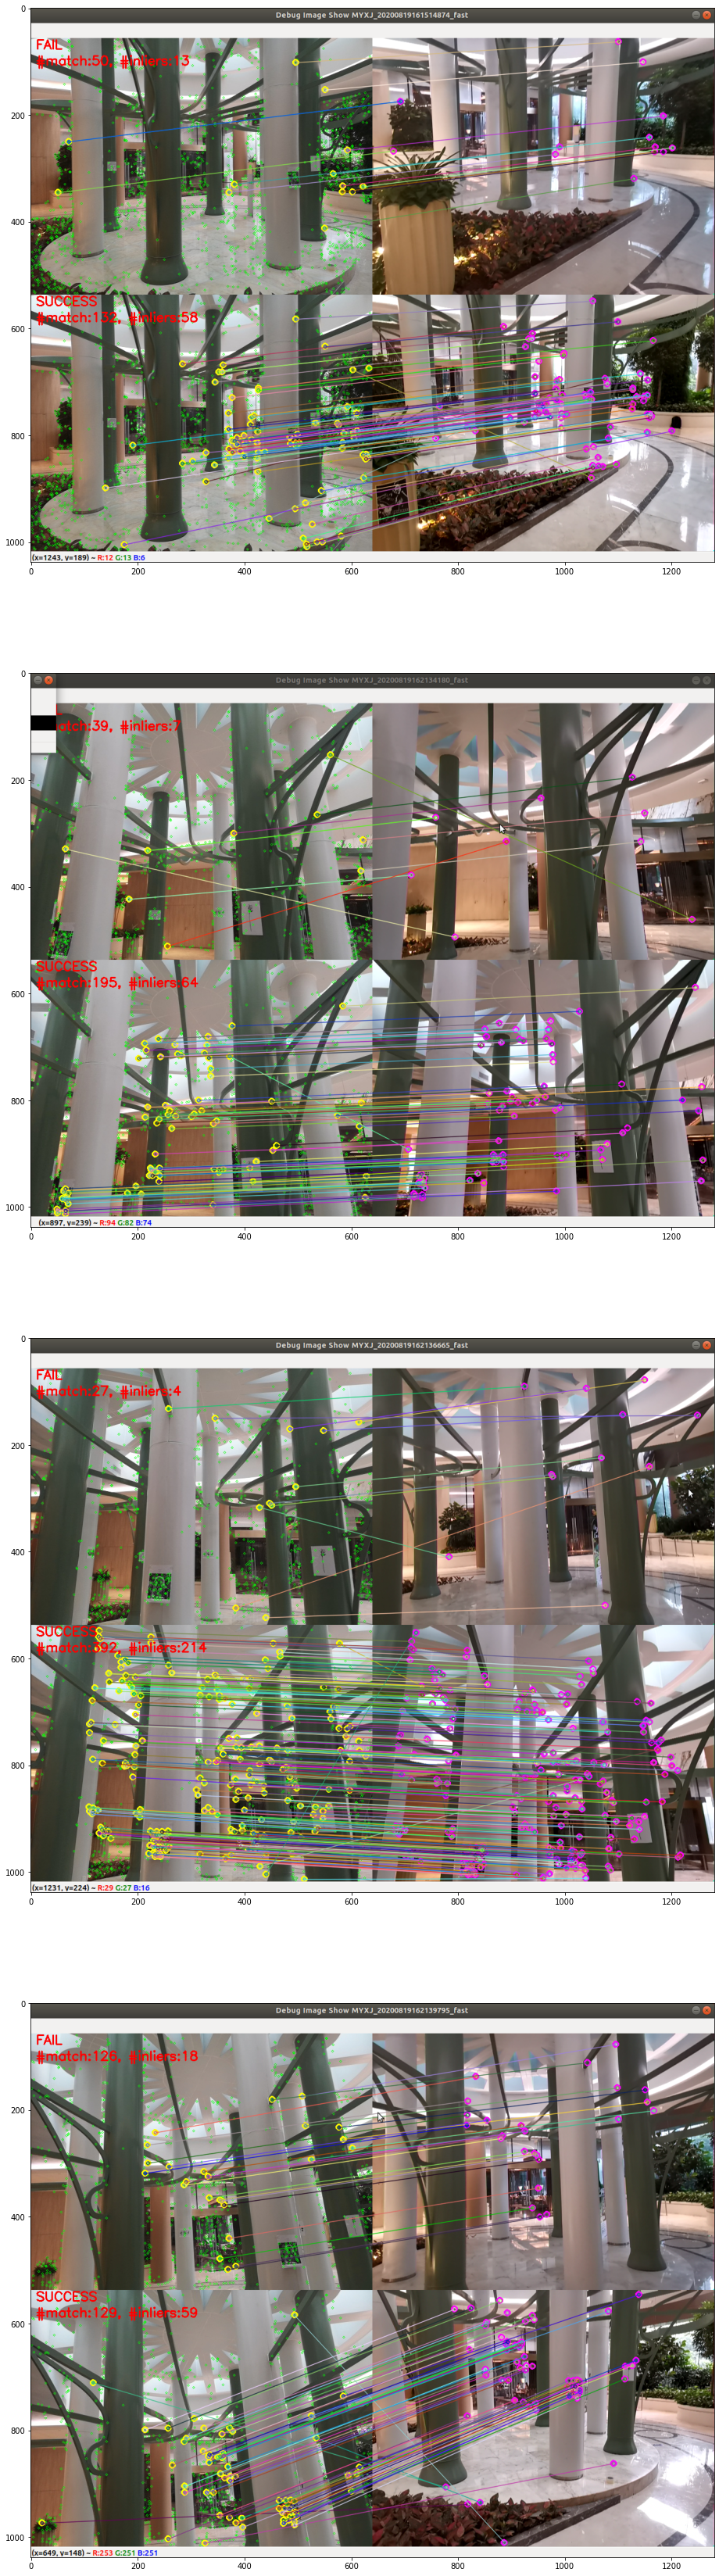

In [46]:
show_folder = "typical_images"
show_images = glob.glob(show_folder + "/*")
show_images.sort()
plt.figure(figsize = (20,60))
for i in range(len(show_images)):
    image_cv = cv2.imread(show_images[i])
    b,g,r = cv2.split(image_cv)  
    image_cv = cv2.merge([r,g,b])  
    plt.subplot(len(show_images), 1 , (i+1))
    plt.imshow(image_cv)